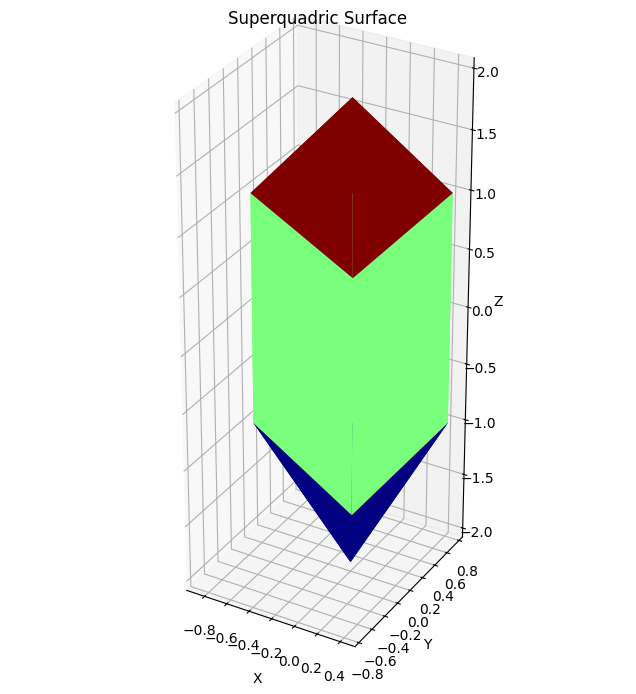

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate superquadric surface
def superquadric(u, v, a=1, b=1, c=1, p=2):
    # Parametric equations for the superquadric
    x = a * np.sign(np.cos(u))* np.abs(np.cos(u))**(2/p) * np.sign(np.cos(v)) * np.abs(np.cos(v))**(2/p)
    y = b * np.sign(np.cos(v))* np.abs(np.cos(v))**(2/p) * np.sign(np.sin(u)) * np.abs(np.sin(u))**(2/p)
    z = c * np.sign(np.sin(v)) * np.abs(np.sin(v))**(2/p)
    return x, y, z

# Number of steps in u and v directions
u_steps = 4  # Number of steps for u (adjust for higher resolution)
v_steps = 4  # Number of steps for v (adjust for higher resolution)

# u, v parametrization
u = np.linspace(-np.pi, np.pi, u_steps)
v = np.linspace(-np.pi/2, np.pi/2, v_steps)

# Meshgrid for u, v
u, v = np.meshgrid(u, v)

# Get the x, y, z coordinates
x, y, z = superquadric(u, v, a=1, b=1, c=2, p=2)

# Create the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
inferno_reversed = plt.get_cmap('inferno_r')
jet = plt.get_cmap('jet')
ax.plot_surface(x, y, z, cmap=jet, edgecolor='none')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Superquadric Surface')

ax.set_aspect('equal')

# Show the plot
plt.show()


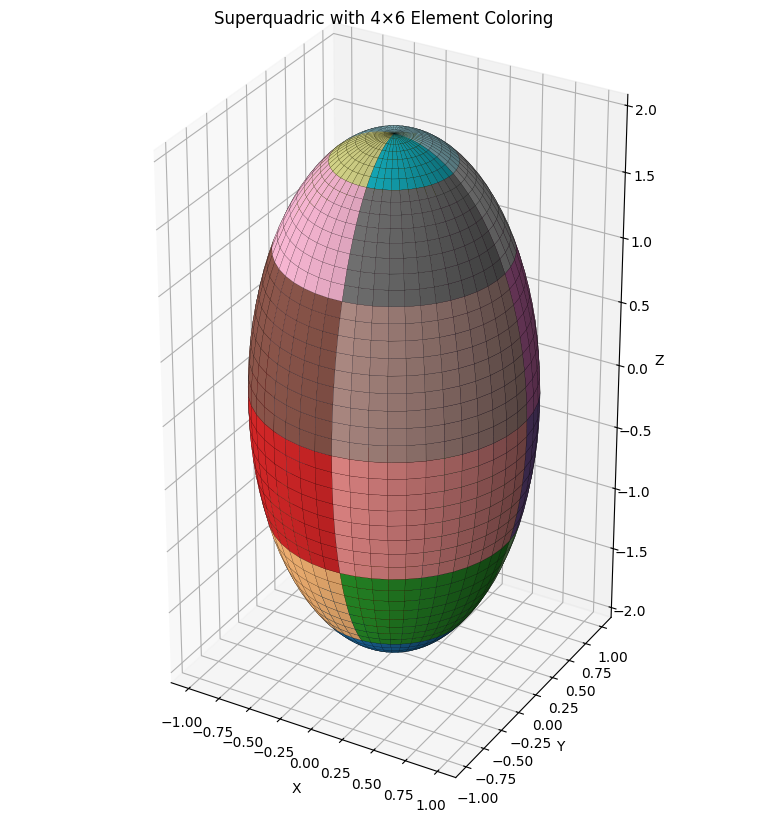

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Function to generate superquadric surface
def superquadric(u, v, a=1, b=1, c=1, p=2):
    x = a * np.sign(np.cos(u)) * np.abs(np.cos(u))**(2/p) * np.sign(np.cos(v)) * np.abs(np.cos(v))**(2/p)
    y = b * np.sign(np.cos(v)) * np.abs(np.cos(v))**(2/p) * np.sign(np.sin(u)) * np.abs(np.sin(u))**(2/p)
    z = c * np.sign(np.sin(v)) * np.abs(np.sin(v))**(2/p)
    return x, y, z

# High-resolution grid
u_steps, v_steps = 40, 40
u = np.linspace(-np.pi, np.pi, u_steps)
v = np.linspace(-np.pi/2, np.pi/2, v_steps)
u, v = np.meshgrid(u, v)

# Surface coordinates
x, y, z = superquadric(u, v, a=1, b=1, c=2, p=2)

# Define number of elements in phi (u direction) and theta (v direction)
n_phi = 4   # elements along u (phi)
n_theta = 6  # elements along v (theta)

# Create an array to store element indices
element_ids = np.zeros_like(u, dtype=int)

# Assign each (u, v) pair an element ID based on its interval
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        phi_id = int(j / (u_steps / n_phi))
        theta_id = int(i / (v_steps / n_theta))
        element_ids[i, j] = theta_id * n_phi + phi_id

# Normalize the element IDs to map to colors
norm = mcolors.Normalize(vmin=element_ids.min(), vmax=element_ids.max())

# Create a colormap
cmap = plt.cm.tab20  # Discrete color map with enough distinct colors
face_colors = cmap(norm(element_ids))

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, facecolors=face_colors, rstride=1, cstride=1, edgecolor='k', linewidth=0.1)

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Superquadric with {n_phi}×{n_theta} Element Coloring')
# ax.set_box_aspect([1, 1, 1])  # Equal aspect ratio
ax.set_aspect('equal')

plt.tight_layout()
plt.show()


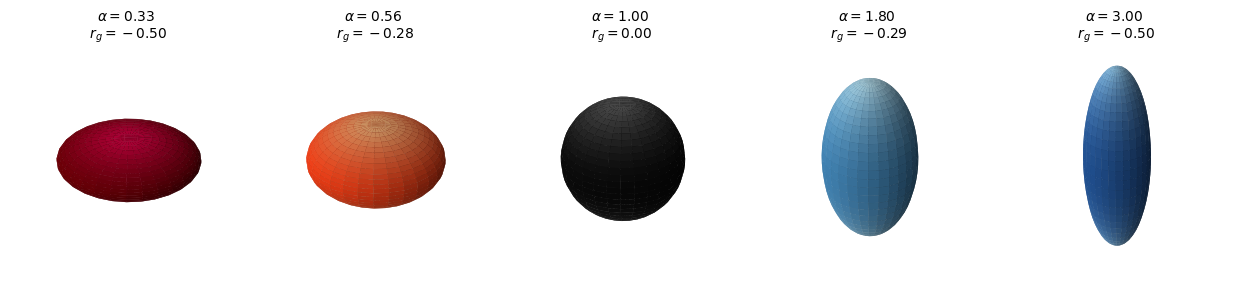

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

# Unique k values
k_values = [0.33, 0.4, 0.5, 0.56, 0.67, 0.83, 1.2, 1.5, 1.8, 2.0, 2.5, 3.0]

k_values = [0.33, 0.56, 1.0,  1.8, 3.0]

aspect_ratios = sorted(set(k_values + [1 / k for k in k_values] + [1.0]))

# Create colormap
colormap = plt.cm.RdYlBu
num_colors = len(aspect_ratios)
extreme_indices = np.concatenate([
    np.linspace(0, 0.3, num_colors // 2, endpoint=False),
    np.linspace(0.7, 1.0, num_colors - num_colors // 2)
])
colors = [colormap(i) for i in extreme_indices]
central_index = aspect_ratios.index(1.0)
# colors.insert(central_index, 'black')
dark_gray = (0.2, 0.2, 0.2)
colors.insert(central_index, dark_gray)

color_map_dict = dict(zip(aspect_ratios, colors))

# Light source for enhanced shading
ls = LightSource(azdeg=200, altdeg=45)



# Function to plot spheroid with lighting
def plot_spheroid(ax, ap, base_color):
    if ap < 1:
        a, c = 1, ap
        rg = (ap-1) / (ap + 1)
    else:
        a, c = 1 / ap, 1
        rg = (1 - ap) / (1 + ap)

    u = np.linspace(0, 2 * np.pi, 40)
    v = np.linspace(0, np.pi, 40)
    x = a * np.outer(np.cos(u), np.sin(v))
    y = a * np.outer(np.sin(u), np.sin(v))
    z = c * np.outer(np.ones_like(u), np.cos(v))

    # Compute normals for shading
    rgb = ls.shade_rgb(np.ones((x.shape[0], x.shape[1], 3)) * base_color[:3], z, vert_exag=0.6, blend_mode='soft')
    ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=rgb, linewidth=0.05, edgecolor='none')

    ax.set_aspect("equal")
    ax.axis('off')
    ax.set_title(f"$\\alpha = {ap:.2f}$\n $r_g = {rg:.2f}$", fontsize=10)

# Plotting setup
fig, axes = plt.subplots(1, len(k_values), subplot_kw={'projection': '3d'}, figsize=(2.5 * len(k_values), 6))
plt.subplots_adjust(wspace=-0.1, hspace=0.2)

# for col, k in enumerate(k_values):
#     for row, ap in enumerate([1 / k, k]):
#         ax = axes[row, col]
#         color = color_map_dict[ap]
#         plot_spheroid(ax, ap, plt.cm.colors.to_rgb(color))

for i, color in enumerate(k_values):
    ax = axes[i]
    ap = k_values[i]
    plot_spheroid(ax, ap, plt.cm.colors.to_rgb(color_map_dict[ap]))



plt.tight_layout()
# plt.savefig("spheroids_with_shading.png", dpi=400, bbox_inches='tight')
plt.show()


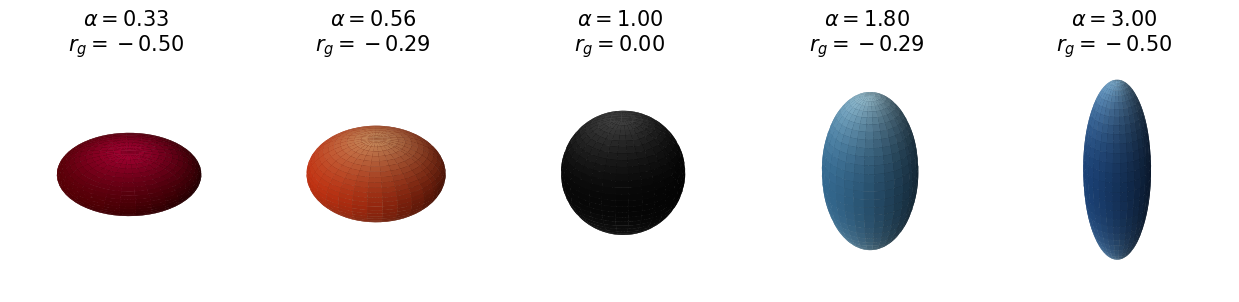

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LightSource

# Unique k values
k_values = [0.33, 0.5556, 1.0, 1.8, 3.0]
aspect_ratios = sorted(set(k_values + [1 / k for k in k_values] + [1.0]))

# Create colormap
colormap = plt.cm.RdYlBu
num_colors = len(aspect_ratios)
extreme_indices = np.concatenate([
    np.linspace(0, 0.3, num_colors // 2, endpoint=False),
    np.linspace(0.7, 1.0, num_colors - num_colors // 2)
])
colors = [colormap(i) for i in extreme_indices]

# Use dark gray instead of black for better shading
central_index = aspect_ratios.index(1.0)
dark_gray = (0.2, 0.2, 0.2)
colors.insert(central_index, dark_gray)

color_map_dict = dict(zip(aspect_ratios, colors))

# Light source for enhanced shading
ls = LightSource(azdeg=340, altdeg=45)

# Function to plot spheroid with improved lighting
def plot_spheroid(ax, ap, base_color):
    if ap < 1:
        a, c = 1, ap
        rg = (ap - 1) / (ap + 1)
    else:
        a, c = 1 / ap, 1
        rg = (1 - ap) / (1 + ap)

    u = np.linspace(0, 2 * np.pi, 60)
    v = np.linspace(0, np.pi, 60)
    x = a * np.outer(np.cos(u), np.sin(v))
    y = a * np.outer(np.sin(u), np.sin(v))
    z = c * np.outer(np.ones_like(u), np.cos(v))

    # Slightly darken base color to help shading
    base_rgb = np.array(base_color) * 0.9
    rgb_base = np.ones((*x.shape, 3)) * base_rgb

    # Enhanced shading
    shaded = ls.shade_rgb(rgb_base, z, vert_exag=0.1, blend_mode='soft')#'overlay')

    ax.plot_surface(x, y, z, facecolors=shaded, linewidth=0, edgecolor='none')
    ax.set_aspect("equal")
    ax.axis('off')
    ax.set_title(f"$\\alpha = {ap:.2f}$\n$r_g = {rg:.2f}$", fontsize=15)

# Plotting setup
fig, axes = plt.subplots(1, len(k_values), subplot_kw={'projection': '3d'}, figsize=(2.5 * len(k_values), 6))
plt.subplots_adjust(wspace=-0.1, hspace=0.2)

for i, ap in enumerate(k_values):
    ax = axes[i]
    plot_spheroid(ax, ap, plt.cm.colors.to_rgb(color_map_dict[ap]))

plt.tight_layout()
# Save the output if desired
plt.savefig("spheroids_with_improved_shading.png", dpi=400, bbox_inches='tight')
plt.show()


/home/jacopo/venvs/jupyter-env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


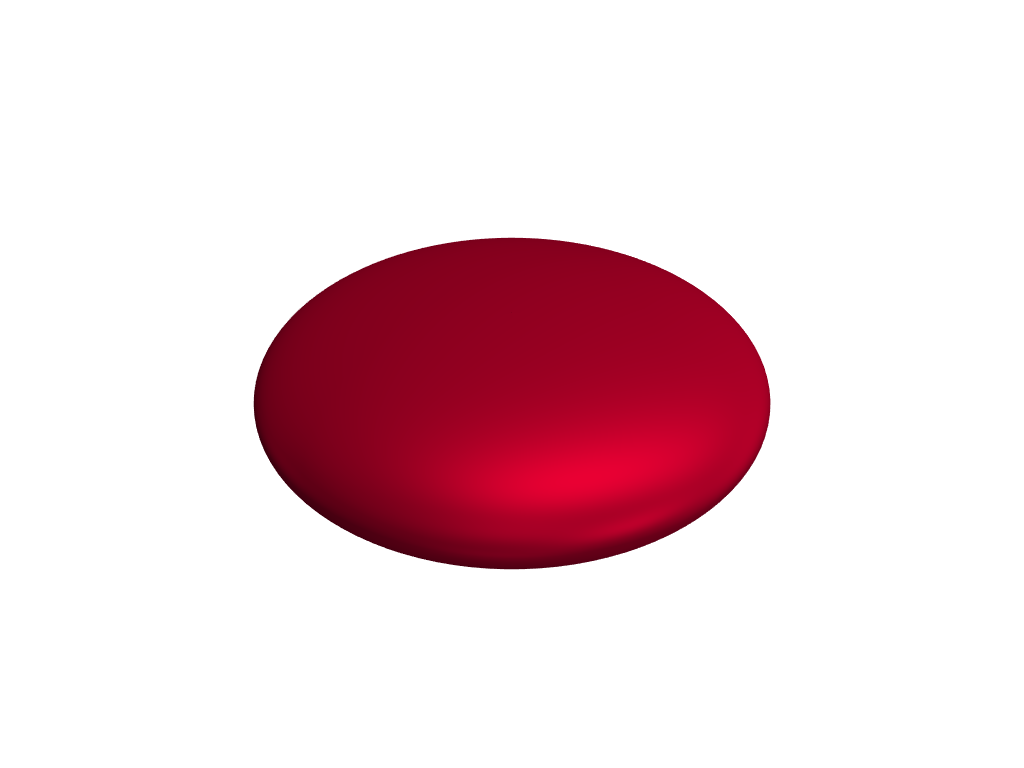

/home/jacopo/venvs/jupyter-env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


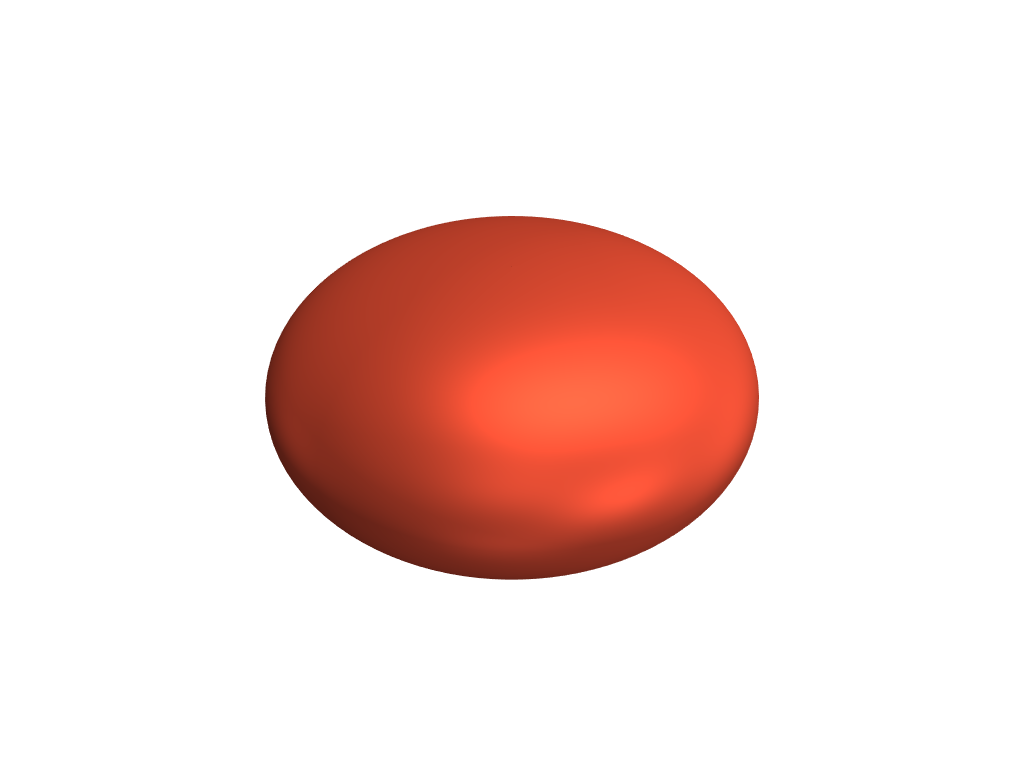

/home/jacopo/venvs/jupyter-env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


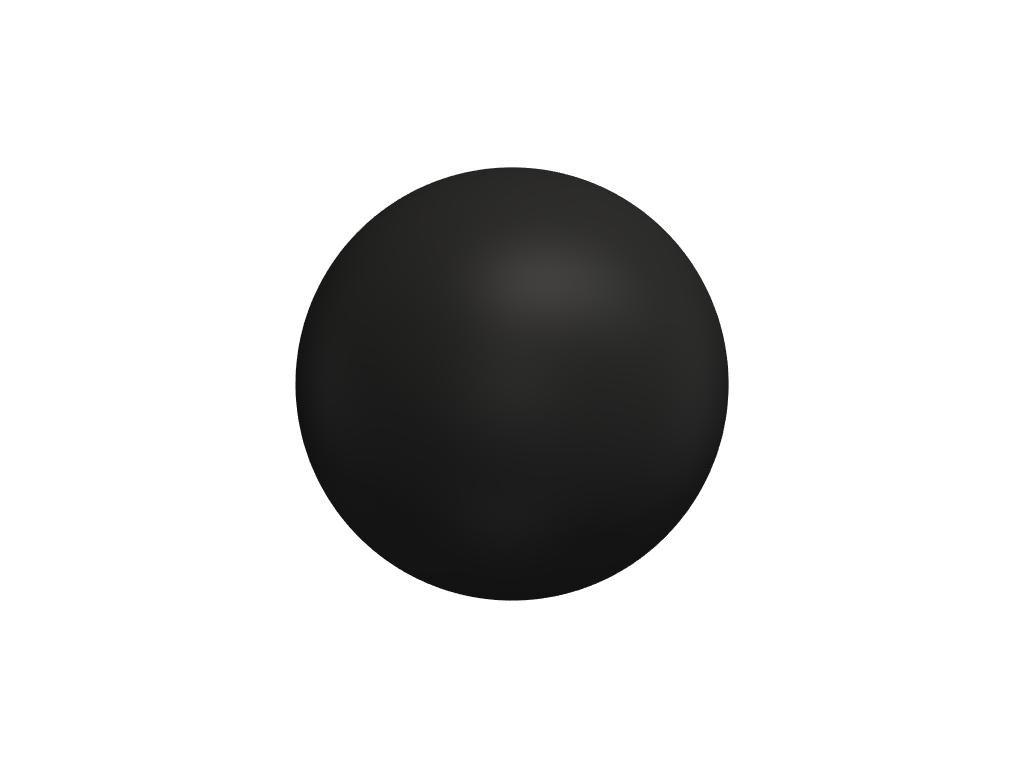

/home/jacopo/venvs/jupyter-env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


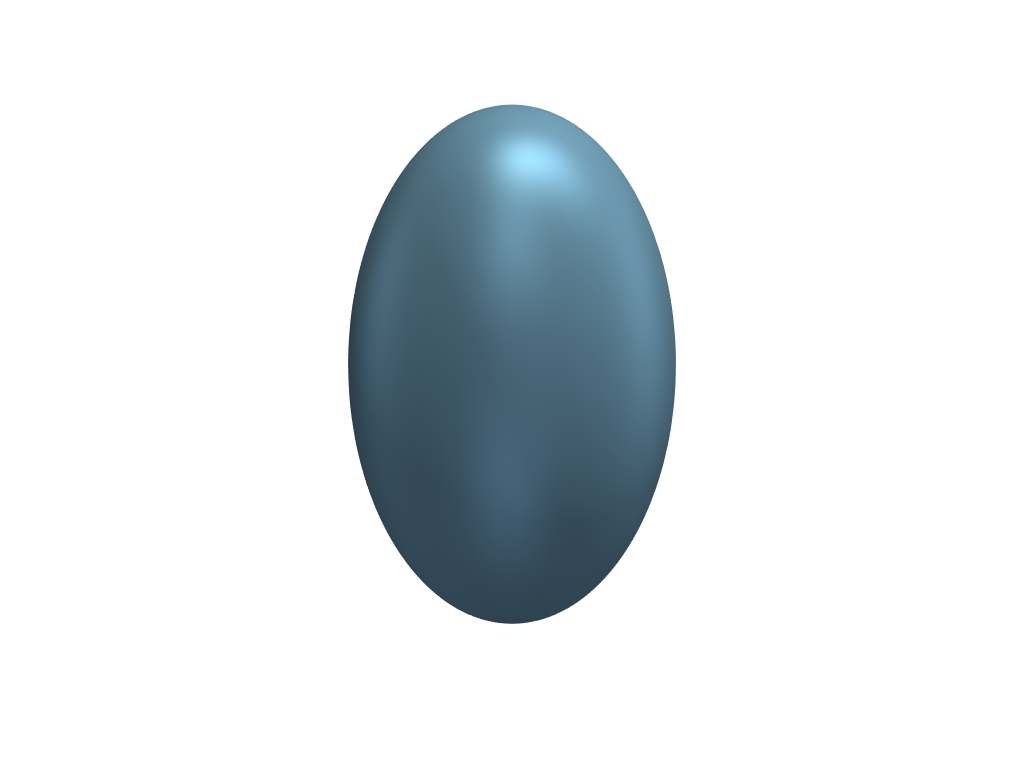

/home/jacopo/venvs/jupyter-env/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


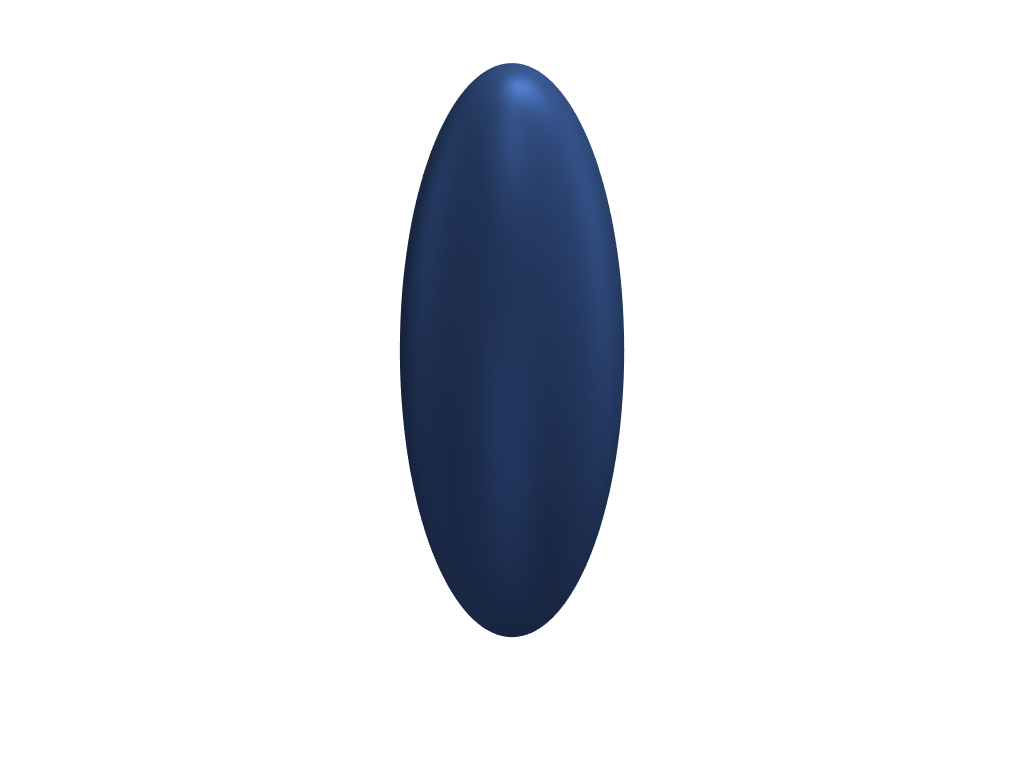

In [17]:
import pyvista as pv


aspect_ratios_to_show = aspect_ratios[::2]  

for i, ap in enumerate(aspect_ratios_to_show):
    if ap > 1:
        spheroid = pv.ParametricEllipsoid(1, 1, ap)  # Prolate (elongated)
    else:
        spheroid = pv.ParametricEllipsoid(1/ap, 1/ap, 1)  # Oblate (flattened)
    
    plotter = pv.Plotter()
    plotter.lighting = 'none'  # Disable default lighting
    
    # Main key light - slightly off-axis to show curvature
    key_light = pv.Light(position=(-3, 2, 5), 
                        intensity=0.5, 
                        light_type='scenelight',
                        color='white')
    key_light.focal_point = (0, 0, 0)
    plotter.add_light(key_light)
    
    # # Fill light - softer light from opposite side
    # fill_light = pv.Light(position=(-3, -1, 3),
    #                      intensity=0.3,
    #                      light_type='scenelight',
    #                      color='white')
    # fill_light.focal_point = (0, 0, 0)
    # plotter.add_light(fill_light)
    
    # # Back light - helps separate object from background
    # back_light = pv.Light(position=(0, 0, -5),
    #                      intensity=0.2,
    #                      light_type='scenelight',
    #                      color='white')
    # back_light.focal_point = (0, 0, 0)
    # plotter.add_light(back_light)
    
    # For oblate specifically, add a rim light to highlight the edge
    if ap < 1:
        rim_light = pv.Light(position=(0, 5, 0.5),
                           intensity=0.5,
                           light_type='scenelight',
                           color='white')
        rim_light.focal_point = (0, 0, 0)
        plotter.add_light(rim_light)
    
    plotter.add_mesh(
        spheroid,
        color=color_map_dict[ap],
        specular=0.5,          # Reduced from 0.9 to avoid over-shiny look
        specular_power=10.0,   # Increased for tighter highlight
        ambient=0.2,           # Slightly increased for better base visibility
        smooth_shading=True,
        diffuse=0.5           # Added for better light response
    )
    
    # Set background to neutral gray for better contrast
    # plotter.set_background('lightgray')
    plotter.save_graphic(f"spheroid_{i}.pdf")
    plotter.show()

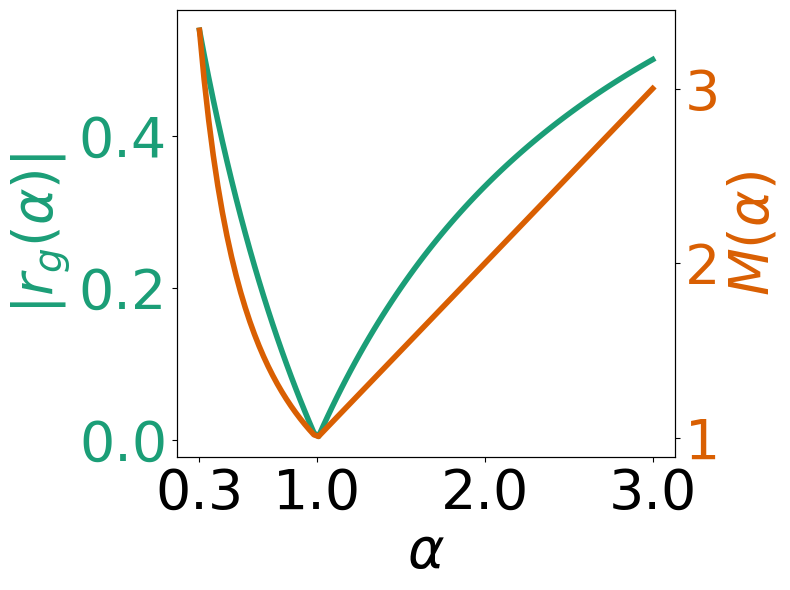

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm


alphas = np.linspace(0.3, 3.0, 100)
inv_alphas = 1 / alphas
m_alphas = np.maximum(alphas, inv_alphas)
r_gs = (alphas - 1) / (alphas + 1)
r_gs = np.abs(r_gs)

fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# Plot with new colors
ax2.plot(alphas, m_alphas, color='#d95f02', label='m(α)', linewidth=4)
ax1.plot(alphas, r_gs, color='#1b9e77', label='r_g(α)', linewidth=4)

# Labels
ax1.set_xlabel('$\\alpha$', fontsize=40)
ax2.set_ylabel('$M(\\alpha)$', fontsize=40, color='#d95f02')
ax1.set_ylabel('$|r_g(\\alpha)|$', fontsize=40, color='#1b9e77')

# Ticks
ax2.tick_params(axis='y', labelcolor='#d95f02', labelsize=40)
ax1.tick_params(axis='y', labelcolor='#1b9e77', labelsize=40)
ax1.tick_params(axis='x', labelsize=40)
ax1.set_xticks([0.3, 1.0, 2.0, 3.0])

fig.tight_layout()
plt.savefig("m_alpha_rg.png", dpi=300, bbox_inches='tight')


# ax1.set_title('Aspect Ratio and Radius of Gyration as Functions of α', fontsize=16)